In [1]:
import pandas as pd
import datetime
from os import listdir
import os, os.path
from os.path import isfile, join
import numpy as np
import csv
import re
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
from pm4py.objects.log.util import dataframe_utils
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

In [2]:
# pip install pingouin

Processing c:\users\maria\appdata\local\pip\cache\wheels\14\46\f9\cedd81d68d2515c24bbbd000d5b347e4fe092ccc4b568f7f70\pingouin-0.5.0-py3-none-any.whl
  Using cached outdated-0.2.1-py3-none-any.whl (7.5 kB)
  Using cached statsmodels-0.13.0-cp37-none-win_amd64.whl (9.4 MB)
  Using cached pandas_flavor-0.2.0-py2.py3-none-any.whl (6.6 kB)
  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
Processing c:\users\maria\appdata\local\pip\cache\wheels\d6\64\cd\32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d\littleutils-0.2.2-py3-none-any.whl
  Using cached patsy-0.5.2-py2.py3-none-any.whl (233 kB)
  Using cached xarray-0.19.0-py3-none-any.whl (827 kB)
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.1
    Uninstalling patsy-0.5.1:
      Successfully uninstalled patsy-0.5.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.11.0
    Uninstalling statsmodels-0.11.0:
      Successfully uninstalled statsmodels-0.11.0
Note: you may need to

In [15]:
# datos_raw = pd.read_excel("./grouped table of annotations.xlsx")
# # datos_raw=datos_raw.drop(['Unnamed: 0'], axis='columns')
# glosario = pd.read_excel("./OperationCoding (cycle time).xlsx")
# glosario['General operations'] = glosario['General operations'].fillna(method='pad')
# glosario['Specific operations'] =  glosario['Specific operations'].str.split().str.join(' ')
# glosario['General operations'] =  glosario['General operations'].str.split().str.join(' ')

# # columns=['case:concept:name','General operation','Specific operation','Time','Question','Year', 'Category']
# column=['case:concept:name','concept:name','Specific operation','time:timestamp', 'Report', 'Question','Year', 'Category']
# #columna es el case_ID
# cont = 0
# df_prueba= pd.DataFrame(columns=column)
# for columna in datos_raw.columns:
#     acciones_analisis=datos_raw[columna].dropna()
#     for accion in acciones_analisis:
        
#         accion = re.sub('[\xa0]', ' ', accion)
# #         print(' *************************** ', accion)
#         string_dividido=accion.split(' ')
#         accion = ' '.join(string_dividido)
#         for fila in range(len(glosario)):
                       
#             if(accion == glosario['Specific operations'][fila]):
#                 #print('si', accion)
#                 accionGeneral=glosario['General operations'][fila]
#                 accionEspecifica=accion
#                 columnaSeparada=columna.split()
#                 report=columnaSeparada[0]
#                 pregunta=columnaSeparada[1]
#                 año=columnaSeparada[3]
#                 categoria=datos_raw.loc[0][columna]
#                 ct=datetime.datetime.now() + datetime.timedelta(days=1)
#                 new_row={'case:concept:name':columna, 'concept:name':accionGeneral,
#                          'Specific operation':accionEspecifica,'time:timestamp':str(ct),
#                          'Report':report, 'Question':pregunta, 'Year':año, 'Category':categoria} 
# #                 print(cont, new_row['case:concept:name'])
#                 cont = cont +1
#                 df_prueba = df_prueba.append(new_row, ignore_index=True)
                
#             elif(accion == glosario['General operations'][fila]):
#                 #print('no', accion)
#                 accionGeneral=accion
#                 accionEspecifica=" "
#                 columnaSeparada=columna.split()
#                 report=columnaSeparada[0]
#                 pregunta=columnaSeparada[1]
#                 año=columnaSeparada[3]
#                 categoria=datos_raw.loc[0][columna]
#                 ct=datetime.datetime.now() + datetime.timedelta(days=1)
#                 new_row={'case:concept:name':columna, 'concept:name':accionGeneral,
#                          'Specific operation':accionEspecifica,'time:timestamp':str(ct),
#                          'Report':report, 'Question':pregunta,'Year':año, 'Category':categoria} 
# #                 print(cont, new_row['case:concept:name'])
#                 cont = cont +1
#                 df_prueba = df_prueba.append(new_row, ignore_index=True)
            
                
            
# df_prueba

In [2]:
df_prueba = pd.read_csv("logCT2.csv",index_col=0)
df_prueba

,case:concept:name,concept:name,Specific operation,time:timestamp,Report,Question,Year,Category,Type
0,A1 P2 BPI 2020,Calculate cycle time,Calculate cycle time of the whole process for ...,2021-10-19 12:47:13.651481,A1,P2,2020,Academic,Analyze Cycle Time
1,A1 P2 BPI 2020,Compare cycle time,,2021-10-19 12:47:13.659459,A1,P2,2020,Academic,Analyze Cycle Time
2,A2 P2 BPI 2020,Calculate cycle time,Get cycle time from the previous question,2021-10-19 12:47:13.666495,A2,P2,2020,Student,Analyze Cycle Time
3,A2 P2 BPI 2020,Compare cycle time,,2021-10-19 12:47:13.666495,A2,P2,2020,Student,Analyze Cycle Time
4,A7 P2 BPI 2020,Calculate throughput,,2021-10-19 12:47:13.682150,A7,P2,2020,Academic,Analyze Cycle Time
...,...,...,...,...,...,...,...,...,...
943,A19 P1 BPI 2020,Group traces,Group traces by year,2021-10-19 12:47:20.534786,A19,P1,2020,Professional,Manipulation
944,A19 P1 BPI 2020,Group traces,Group traces by activities,2021-10-19 12:47:20.534786,A19,P1,2020,Professional,Manipulation
945,A19 P1 BPI 2020,Calculate statistics,Calculate Statistics of activities,2021-10-19 12:47:20.557196,A19,P1,2020,Professional,Calculate statistics
946,A19 P1 BPI 2020,Calculate throughput,,2021-10-19 12:47:20.567144,A19,P1,2020,Professional,Analyze Cycle Time


In [3]:
reports = pd.read_excel("./Reports BPI Challenge.xlsx")
reports['BPI Challenge'] = reports['BPI Challenge'].fillna(method='pad')

reports['BPI Challenge'] = reports['BPI Challenge'].astype(int)
reports["BPI Challenge"]=reports["BPI Challenge"].apply(str)

reports["Unnamed: 1"]=reports["Unnamed: 1"].apply(str)
reports['Tupla'] = reports['Unnamed: 1'] + reports["BPI Challenge"]

df_prueba["Year"]=df_prueba["Year"].apply(str)
df_prueba['Tupla'] = df_prueba['Report'] + df_prueba["Year"]

sLength = len(df_prueba['Tupla'])
df_prueba['Organization'] = pd.Series(np.random.randn(sLength), index=df_prueba.index)

df_prueba['prueba']= ""
df_prueba.drop(['Organization', 'prueba'], axis=1)

,case:concept:name,concept:name,Specific operation,time:timestamp,Report,Question,Year,Category,Type,Tupla
0,A1 P2 BPI 2020,Calculate cycle time,Calculate cycle time of the whole process for ...,2021-10-19 12:47:13.651481,A1,P2,2020,Academic,Analyze Cycle Time,A12020
1,A1 P2 BPI 2020,Compare cycle time,,2021-10-19 12:47:13.659459,A1,P2,2020,Academic,Analyze Cycle Time,A12020
2,A2 P2 BPI 2020,Calculate cycle time,Get cycle time from the previous question,2021-10-19 12:47:13.666495,A2,P2,2020,Student,Analyze Cycle Time,A22020
3,A2 P2 BPI 2020,Compare cycle time,,2021-10-19 12:47:13.666495,A2,P2,2020,Student,Analyze Cycle Time,A22020
4,A7 P2 BPI 2020,Calculate throughput,,2021-10-19 12:47:13.682150,A7,P2,2020,Academic,Analyze Cycle Time,A72020
...,...,...,...,...,...,...,...,...,...,...
943,A19 P1 BPI 2020,Group traces,Group traces by year,2021-10-19 12:47:20.534786,A19,P1,2020,Professional,Manipulation,A192020
944,A19 P1 BPI 2020,Group traces,Group traces by activities,2021-10-19 12:47:20.534786,A19,P1,2020,Professional,Manipulation,A192020
945,A19 P1 BPI 2020,Calculate statistics,Calculate Statistics of activities,2021-10-19 12:47:20.557196,A19,P1,2020,Professional,Calculate statistics,A192020
946,A19 P1 BPI 2020,Calculate throughput,,2021-10-19 12:47:20.567144,A19,P1,2020,Professional,Analyze Cycle Time,A192020


In [4]:
# lista=[]
df_prueba['Organization'] = ""
for d in range(len(df_prueba)):
    for r in range(len(reports)):
        if(df_prueba.loc[d]['Tupla'] == reports.loc[r]['Tupla']):
#             print('si')
#             print(reports.iloc[r]['Universidad/Organización'])
#             lista.append(reports.loc[r]['Universidad/Organización'])
             df_prueba.iloc[d]['Organization'] = reports.loc[r]['Universidad/Organización']
    
df_prueba.drop(['prueba'], axis=1)

,case:concept:name,concept:name,Specific operation,time:timestamp,Report,Question,Year,Category,Type,Tupla,Organization
0,A1 P2 BPI 2020,Calculate cycle time,Calculate cycle time of the whole process for ...,2021-10-19 12:47:13.651481,A1,P2,2020,Academic,Analyze Cycle Time,A12020,"Technische Universität, Berlin"
1,A1 P2 BPI 2020,Compare cycle time,,2021-10-19 12:47:13.659459,A1,P2,2020,Academic,Analyze Cycle Time,A12020,"Technische Universität, Berlin"
2,A2 P2 BPI 2020,Calculate cycle time,Get cycle time from the previous question,2021-10-19 12:47:13.666495,A2,P2,2020,Student,Analyze Cycle Time,A22020,"Faculty of Science, Utrecht University"
3,A2 P2 BPI 2020,Compare cycle time,,2021-10-19 12:47:13.666495,A2,P2,2020,Student,Analyze Cycle Time,A22020,"Faculty of Science, Utrecht University"
4,A7 P2 BPI 2020,Calculate throughput,,2021-10-19 12:47:13.682150,A7,P2,2020,Academic,Analyze Cycle Time,A72020,German Research Center for Artificial Intellig...
...,...,...,...,...,...,...,...,...,...,...,...
943,A19 P1 BPI 2020,Group traces,Group traces by year,2021-10-19 12:47:20.534786,A19,P1,2020,Professional,Manipulation,A192020,Sberbank
944,A19 P1 BPI 2020,Group traces,Group traces by activities,2021-10-19 12:47:20.534786,A19,P1,2020,Professional,Manipulation,A192020,Sberbank
945,A19 P1 BPI 2020,Calculate statistics,Calculate Statistics of activities,2021-10-19 12:47:20.557196,A19,P1,2020,Professional,Calculate statistics,A192020,Sberbank
946,A19 P1 BPI 2020,Calculate throughput,,2021-10-19 12:47:20.567144,A19,P1,2020,Professional,Analyze Cycle Time,A192020,Sberbank


In [5]:
df_report_year = df_prueba.groupby(by=['Question', 'Year'])
for name, group in df_report_year:
    operations = group['concept:name'].to_list()
    

In [13]:
# df_jaccard['case:concept:name'] = 'hola'
# df_jaccard

In [14]:
# pip install -u pandas==1.2.1

In [7]:
#  pip install -u numpy==1.19.5

Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\maria\anaconda3\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\Users\maria\anaconda3\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\Users\maria\anaconda3\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\Users\maria\anaconda3\python.exe -m pip install [options] [-e] <local project path> ...
  C:\Users\maria\anaconda3\python.exe -m pip install [options] <archive url/path> ...

no such option: -u


In [15]:
# pip install -r /test-requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: '/test-requirements.txt'


In [5]:
# pip install --upgrade pandas

  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.1
    Uninstalling pandas-1.0.1:
      Successfully uninstalled pandas-1.0.1
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Acceso denegado: 'c:\\users\\maria\\anaconda3\\lib\\site-packages\\~andas\\_libs\\algos.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [6]:
df_agrupado = pd.DataFrame(columns=['case:concept:name','Operations','Organization', 'Year', 'Question'])

In [7]:
df_analisis = df_prueba.groupby(by=['case:concept:name'])
# columns=['case:concept:name','Operations','Organization', 'Year', 'Question']
df_agrupado = pd.DataFrame(columns=['case:concept:name','Operations','Organization', 'Year', 'Question'])
for name, group in df_analisis:
    org = group.iloc[0]['Organization']
    year = group.iloc[0]['Year']
    question = group.iloc[0]['Question']
    lista = group['concept:name'].to_list()
        
    new_row={'case:concept:name':name, 'Operations':lista, 'Organization':org, 'Year':year, 'Question':question} 
    df_agrupado = df_agrupado.append(new_row, ignore_index=True)

In [8]:
df_agrupado

,case:concept:name,Operations,Organization,Year,Question
0,A1 P1 BPI 2017,"[Calculate cycle time, Calculate cycle time, F...",University of Liechtenstein\nVienna University...,2017,P1
1,A1 P1 BPI 2020,"[Filter traces, Calculate cycle time, Calculat...","Technische Universität, Berlin",2020,P1
2,A1 P2 BPI 2019,"[Group events by time, Calculate cycle time, R...",University of Melbourne,2019,P2
3,A1 P2 BPI 2020,"[Calculate cycle time, Compare cycle time]","Technische Universität, Berlin",2020,P2
4,A1 P5 BPI 2015,"[Calculate cycle time, Identify organizational...",Meijer & Van der Ham Management Consultants,2015,P5
...,...,...,...,...,...
121,A8 P1 BPI 2017,"[Filter traces, Calculate waiting time, Repres...",Universidade Federal do Estado do Rio de Janeiro,2017,P1
122,A8 P5 BPI 2015,"[Calculate cycle time, Compare cycle time, Gro...",GRADIENT ECM,2015,P5
123,A9 P1 BPI 2017,"[Calculate processing time, Calculate waiting ...",POSTECH,2017,P1
124,A9 P2 BPI 2019,"[Filter traces, Calculate cycle time, Identify...",KPMG Netherlands,2019,P2


In [ ]:
# def jaccardIndex(list1,list2):
#     set1=set(list1)
#     set2=set(list2)
#     intersection = set1.intersection(set2)
#     tamIntersection=len(list(intersection))
#     union = set1.union(set2)
#     tamUnion=len(list(union))
# #     print("similitud: "+str(float(tamIntersection)/tamUnion))
#     return float(tamIntersection)/tamUnion

In [23]:
# df2 = df_agrupado.groupby(by=['Year', 'Question'])
# columns=['analisis','organizaciones','jaccard']
# df_jaccard = pd.DataFrame(columns=columns)

# for name, group in df2:
#     for i in range(len(group)-1):
#         if(group.iloc[i]['Organization'] != 'Sberbank'):
#             org1 = 'No_Sberbank'
#         else:
#             org1 = 'Sberbank'
        
#         for j in range(i+1,len(group)-1):
#             grupo = group.iloc[i]['Operations']
#             analisis = group.iloc[i]['case:concept:name'] + "-" + group.iloc[j]['case:concept:name']
                
#             if(group.iloc[j]['Organization'] != 'Sberbank'):
#                 org2 = 'No_Sberbank'
#             else:
#                 org2 = 'Sberbank'
#             org = org1 + "-" + org2
#             jaccard = jaccardIndex(grupo,group.iloc[j]['Operations'])
#             new_row={'analisis':analisis,'organizaciones':org,'jaccard': jaccard} 
#             df_jaccard = df_jaccard.append(new_row, ignore_index=True)
        


In [ ]:
# df_jaccard = df_jaccard.replace({'Sberbank-No_Sberbank':'No_Sberbank-Sberbank'})

In [22]:
# df_jaccard.groupby(by=['organizaciones']).mean()

In [24]:
# from scipy import stats

# group1 =  df_jaccard['organizaciones'] == 'Sberbank-Sberbank'
# group2 =  df_jaccard['organizaciones'] == 'No_Sberbank-Sberbank'
# group3 =  df_jaccard['organizaciones'] == 'No_Sberbank-No_Sberbank'
# stats.kruskal(group1, group2, group3)

# # (statistic=6.2878, pvalue=0.0431)

In [ ]:
# stats.kruskal(group1, group2)

In [ ]:
# stats.kruskal(group2, group3)

In [ ]:
# stats.kruskal(group1, group3)

In [9]:
def overlapIndex(list1,list2):
    set1=set(list1)
    set2=set(list2)
    intersection = set1.intersection(set2)
    len1=len(list(set1))
    len2=len(list(set2))
#     print(float(len(list(intersection))))
#     print(min([len1,len2]))
    overlapIndex=float(len(list(intersection)))/min([len1,len2])
    return overlapIndex

In [10]:
df2 = df_agrupado.groupby(by=['Year', 'Question'])
columns=['analisis','organizaciones','overlap']
df_overlap = pd.DataFrame(columns=columns)

for name, group in df2:
    for i in range(len(group)):
        if(group.iloc[i]['Organization'] != 'Sberbank'):
            org1 = 'No_Sberbank'
        else:
            org1 = 'Sberbank'
        
        for j in range(i+1,len(group)):
            grupo = group.iloc[i]['Operations']
            analisis = group.iloc[i]['case:concept:name'] + "-" + group.iloc[j]['case:concept:name']
                
            if(group.iloc[j]['Organization'] != 'Sberbank'):
                org2 = 'No_Sberbank'
            else:
                org2 = 'Sberbank'
            org = org1 + "-" + org2
            overlap = overlapIndex(grupo,group.iloc[j]['Operations'])
            new_row={'analisis':analisis,'organizaciones':org,'overlap': overlap} 
            df_overlap = df_overlap.append(new_row, ignore_index=True)
            
        
df_overlap = df_overlap.replace({'Sberbank-No_Sberbank':'No_Sberbank-Sberbank'})

In [11]:
df_overlap

,analisis,organizaciones,overlap
0,A1 P5 BPI 2015-A2 P5 BPI 2015,No_Sberbank-No_Sberbank,0.250000
1,A1 P5 BPI 2015-A3 P5 BPI 2015,No_Sberbank-No_Sberbank,0.166667
2,A1 P5 BPI 2015-A4 P5 BPI 2015,No_Sberbank-No_Sberbank,0.250000
3,A1 P5 BPI 2015-A5 P5 BPI 2015,No_Sberbank-No_Sberbank,0.571429
4,A1 P5 BPI 2015-A6 P5 BPI 2015,No_Sberbank-No_Sberbank,0.428571
...,...,...,...
981,A30 P6 BPI 2020-A37 P6 BPI 2020,No_Sberbank-Sberbank,0.333333
982,A30 P6 BPI 2020-A7 P6 BPI 2020,No_Sberbank-No_Sberbank,0.666667
983,A35 P6 BPI 2020-A37 P6 BPI 2020,No_Sberbank-Sberbank,0.000000
984,A35 P6 BPI 2020-A7 P6 BPI 2020,No_Sberbank-No_Sberbank,0.500000


In [25]:
df2 = df_agrupado.groupby(by=['Year', 'Question'])
columns=['analisis','question','overlap']
df_overlap_preguntas = pd.DataFrame(columns=columns)

for name, group in df2:
#     print(name[1])
    for i in range(len(group)):
#         if(group.iloc[i]['Organization'] != 'Sberbank'):
#             org1 = 'No_Sberbank'
#         else:
#             org1 = 'Sberbank'
        
        for j in range(i+1,len(group)):
            grupo = group.iloc[i]['Operations']
            analisis = group.iloc[i]['case:concept:name'] + "-" + group.iloc[j]['case:concept:name']
                
#             if(group.iloc[j]['Organization'] != 'Sberbank'):
#                 org2 = 'No_Sberbank'
#             else:
#                 org2 = 'Sberbank'
#             org = org1 + "-" + org2
            question = name[1] + name[0]
            overlap = overlapIndex(grupo,group.iloc[j]['Operations'])
            new_row={'analisis':analisis, 'question':question, 'overlap': overlap} 
            df_overlap_preguntas = df_overlap_preguntas.append(new_row, ignore_index=True)

In [26]:
df_overlap_preguntas

,analisis,question,overlap
0,A1 P5 BPI 2015-A2 P5 BPI 2015,P52015,0.250000
1,A1 P5 BPI 2015-A3 P5 BPI 2015,P52015,0.166667
2,A1 P5 BPI 2015-A4 P5 BPI 2015,P52015,0.250000
3,A1 P5 BPI 2015-A5 P5 BPI 2015,P52015,0.571429
4,A1 P5 BPI 2015-A6 P5 BPI 2015,P52015,0.428571
...,...,...,...
981,A30 P6 BPI 2020-A37 P6 BPI 2020,P62020,0.333333
982,A30 P6 BPI 2020-A7 P6 BPI 2020,P62020,0.666667
983,A35 P6 BPI 2020-A37 P6 BPI 2020,P62020,0.000000
984,A35 P6 BPI 2020-A7 P6 BPI 2020,P62020,0.500000


In [27]:
df_overlap_preguntas.groupby(by=['question']).mean()

,overlap
question,
P12017,0.558486
P12020,0.492063
P22019,0.582640
P22020,0.394662
P42020,0.344258
P52015,0.480655
P52020,0.654631
P62020,0.597009


In [27]:
# df_overlap = df_overlap.replace({'Sberbank-No_Sberbank':'No_Sberbank-Sberbank'})

In [21]:
df_overlap.groupby(by=['organizaciones']).mean()

,overlap
organizaciones,
No_Sberbank-No_Sberbank,0.544469
No_Sberbank-Sberbank,0.491490
Sberbank-Sberbank,0.421026


In [ ]:
df_overlap.groupby(by=['organizaciones'])['overlap'].var(ddof=0)

In [ ]:
df_overlap.groupby(by=['organizaciones'])['overlap'].var(ddof=0)
df_overlap.groupby(by=['organizaciones'])['overlap'].std(ddof=0)

In [9]:
from scipy import stats

group1 =  df_overlap[df_overlap['organizaciones'] == 'Sberbank-Sberbank']['overlap']
group2 =  df_overlap[df_overlap['organizaciones'] == 'No_Sberbank-Sberbank']['overlap']
group3 =  df_overlap[df_overlap['organizaciones'] == 'No_Sberbank-No_Sberbank']['overlap']
# stats.kruskal(group1, group2, group3)

# (statistic=6.2878, pvalue=0.0431)

NameError: name 'df_overlap' is not defined

In [28]:
stats.kruskal(group1, group3)

KruskalResult(statistic=13.713212339937886, pvalue=0.0002129510881495089)

In [29]:
stats.kruskal(group3, group2)

KruskalResult(statistic=4.409514387221742, pvalue=0.03573901359116791)

In [ ]:
p = df_overlap[df_overlap['organizaciones'] == 'Sberbank-Sberbank']
p[p['overlap'] == 1]

In [30]:
# pip install Pingouin

Processing c:\users\maria\appdata\local\pip\cache\wheels\14\46\f9\cedd81d68d2515c24bbbd000d5b347e4fe092ccc4b568f7f70\pingouin-0.5.0-py3-none-any.whl
  Using cached scipy-1.7.1-cp37-cp37m-win_amd64.whl (33.6 MB)
  Using cached pandas_flavor-0.2.0-py2.py3-none-any.whl (6.6 kB)
  Using cached outdated-0.2.1-py3-none-any.whl (7.5 kB)
  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
  Using cached statsmodels-0.13.0-cp37-none-win_amd64.whl (9.4 MB)
  Using cached xarray-0.19.0-py3-none-any.whl (827 kB)
Processing c:\users\maria\appdata\local\pip\cache\wheels\d6\64\cd\32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d\littleutils-0.2.2-py3-none-any.whl
  Using cached patsy-0.5.2-py2.py3-none-any.whl (233 kB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Acceso denegado: 'c:\\users\\maria\\anaconda3\\lib\\site-packages\\~cipy\\cluster\\_hierarchy.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [22]:
# import pingouin as pg
# import pandas as pd
# import numpy as np

#create DataFrame
# df = pd.DataFrame({'score': [64, 66, 68, 75, 78, 94, 98, 79, 71, 80,
#                              91, 92, 93, 90, 97, 94, 82, 88, 95, 96,
#                              79, 78, 88, 94, 92, 85, 83, 85, 82, 81],
#                    'group': np.repeat(['a', 'b', 'c'], repeats=10)}) 

#perform Welch's ANOVA
pg.welch_anova(dv='overlap', between='organizaciones', data=df_overlap)

,Source,ddof1,ddof2,F,p-unc,np2
0,organizaciones,2,353.563431,7.306129,0.000778,0.016832


In [23]:
pg.pairwise_gameshowell(dv='overlap', between='organizaciones', data=df_overlap)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,No_Sberbank-No_Sberbank,No_Sberbank-Sberbank,0.544469,0.491490,0.052979,0.023370,2.266931,596.111469,0.061371,0.158581
1,No_Sberbank-No_Sberbank,Sberbank-Sberbank,0.544469,0.421026,0.123443,0.035986,3.430274,186.003808,0.002135,0.321592
2,No_Sberbank-Sberbank,Sberbank-Sberbank,0.491490,0.421026,0.070464,0.039345,1.790925,254.169082,0.174905,0.175262


In [25]:
df_overlap[df_overlap['organizaciones'] == 'Sberbank-Sberbank'].head(50)

,analisis,organizaciones,overlap
347,A11 P1 BPI 2020-A12 P1 BPI 2020,Sberbank-Sberbank,0.333333
348,A11 P1 BPI 2020-A13 P1 BPI 2020,Sberbank-Sberbank,0.666667
351,A11 P1 BPI 2020-A19 P1 BPI 2020,Sberbank-Sberbank,0.500000
353,A11 P1 BPI 2020-A24 P1 BPI 2020,Sberbank-Sberbank,0.500000
355,A11 P1 BPI 2020-A26 P1 BPI 2020,Sberbank-Sberbank,0.666667
356,A11 P1 BPI 2020-A28 P1 BPI 2020,Sberbank-Sberbank,0.333333
358,A11 P1 BPI 2020-A31 P1 BPI 2020,Sberbank-Sberbank,1.000000
361,A11 P1 BPI 2020-A37 P1 BPI 2020,Sberbank-Sberbank,1.000000
363,A12 P1 BPI 2020-A13 P1 BPI 2020,Sberbank-Sberbank,0.333333
366,A12 P1 BPI 2020-A19 P1 BPI 2020,Sberbank-Sberbank,0.000000


(array([188.,   6.,  47., 118.,  35., 214., 125.,  35.,  27., 191.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

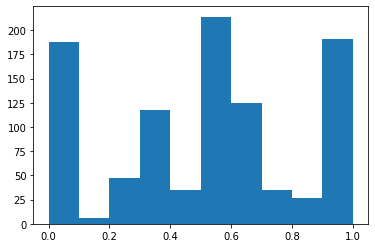

In [17]:
plt.hist(df_overlap.overlap)

In [18]:
shapiro_test = stats.shapiro(group1)
shapiro_test

ShapiroResult(statistic=0.8011818528175354, pvalue=6.685590124046181e-13)

In [19]:
shapiro_test = stats.shapiro(group2)
shapiro_test

ShapiroResult(statistic=0.8674978017807007, pvalue=9.366149532325681e-17)

In [20]:
shapiro_test = stats.shapiro(group3)
shapiro_test

ShapiroResult(statistic=0.9519577026367188, pvalue=1.7476381453107592e-11)

In [21]:
stats.kruskal(group1, group2)

KruskalResult(statistic=3.6932500197658045, pvalue=0.054633064335024614)

In [22]:
stats.kruskal(group1, group3)

KruskalResult(statistic=13.713212339937886, pvalue=0.0002129510881495089)

In [23]:
stats.kruskal(group3, group2)

KruskalResult(statistic=4.409514387221742, pvalue=0.03573901359116791)

In [24]:
stats.kruskal(group1, group2, group3)

KruskalResult(statistic=14.4579249782614, pvalue=0.0007252729515028604)

In [13]:
df_2020 = df_agrupado[df_agrupado['Year']=='2020']

In [18]:
df2 = df_2020.groupby(by=['Year', 'Question'])
columns=['analisis','organizaciones','overlap']
df_overlap = pd.DataFrame(columns=columns)

for name, group in df2:
    for i in range(len(group)):
        if(group.iloc[i]['Organization'] != 'Sberbank'):
            org1 = 'No_Sberbank'
        else:
            org1 = 'Sberbank'
        
        for j in range(i+1,len(group)):
            grupo = group.iloc[i]['Operations']
            analisis = group.iloc[i]['case:concept:name'] + "-" + group.iloc[j]['case:concept:name']
                
            if(group.iloc[j]['Organization'] != 'Sberbank'):
                org2 = 'No_Sberbank'
            else:
                org2 = 'Sberbank'
            org = org1 + "-" + org2
            overlap = overlapIndex(grupo,group.iloc[j]['Operations'])
            new_row={'analisis':analisis,'organizaciones':org,'overlap': overlap} 
            df_overlap = df_overlap.append(new_row, ignore_index=True)
            
        
df_overlap = df_overlap.replace({'Sberbank-No_Sberbank':'No_Sberbank-Sberbank'})

In [19]:
df_overlap

,analisis,organizaciones,overlap
0,A1 P1 BPI 2020-A10 P1 BPI 2020,No_Sberbank-No_Sberbank,0.333333
1,A1 P1 BPI 2020-A11 P1 BPI 2020,No_Sberbank-Sberbank,1.000000
2,A1 P1 BPI 2020-A12 P1 BPI 2020,No_Sberbank-Sberbank,0.333333
3,A1 P1 BPI 2020-A13 P1 BPI 2020,No_Sberbank-Sberbank,1.000000
4,A1 P1 BPI 2020-A16 P1 BPI 2020,No_Sberbank-No_Sberbank,0.666667
...,...,...,...
669,A30 P6 BPI 2020-A37 P6 BPI 2020,No_Sberbank-Sberbank,0.333333
670,A30 P6 BPI 2020-A7 P6 BPI 2020,No_Sberbank-No_Sberbank,0.666667
671,A35 P6 BPI 2020-A37 P6 BPI 2020,No_Sberbank-Sberbank,0.000000
672,A35 P6 BPI 2020-A7 P6 BPI 2020,No_Sberbank-No_Sberbank,0.500000


In [21]:
df_overlap.groupby(by=['organizaciones']).mean()

,overlap
organizaciones,
No_Sberbank-No_Sberbank,0.526381
No_Sberbank-Sberbank,0.491490
Sberbank-Sberbank,0.421026


In [36]:
from scipy import stats

group1 =  df_overlap[df_overlap['organizaciones'] == 'Sberbank-Sberbank']['overlap']
group2 =  df_overlap[df_overlap['organizaciones'] == 'No_Sberbank-Sberbank']['overlap']
group3 =  df_overlap[df_overlap['organizaciones'] == 'No_Sberbank-No_Sberbank']['overlap']
stats.kruskal(group1, group3)

KruskalResult(statistic=6.705006492730769, pvalue=0.00961425806860375)

In [31]:
len(df_overlap[df_overlap['organizaciones'] == 'Sberbank-Sberbank']['analisis'].unique())

148

In [27]:
group1

35     0.333333
36     0.666667
39     0.500000
41     0.500000
43     0.666667
         ...   
633    1.000000
636    0.400000
659    1.000000
662    0.333333
666    0.000000
Name: overlap, Length: 148, dtype: float64

(array([60.,  1.,  4., 14.,  2., 11., 17.,  0.,  1., 38.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

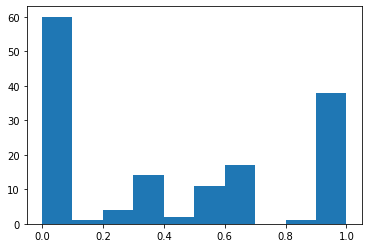

In [25]:
plt.hist(group1)

(array([30.,  0.,  5., 29.,  1., 42., 24.,  0.,  1., 43.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

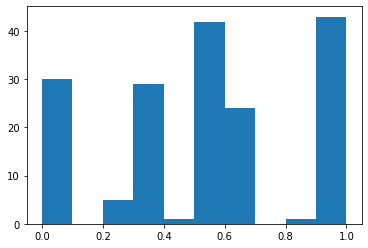

In [26]:
plt.hist(group3)

(array([93.,  1.,  7., 52.,  2., 51., 51.,  4.,  2., 88.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

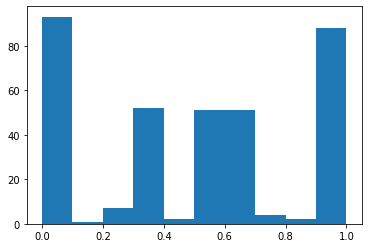

In [32]:
plt.hist(group2)

In [34]:
df_overlap.groupby(by=['organizaciones'])['overlap'].var(ddof=0)

organizaciones
No_Sberbank-No_Sberbank    0.114360
No_Sberbank-Sberbank       0.139858
Sberbank-Sberbank          0.168820
Name: overlap, dtype: float64

In [35]:
df_overlap.groupby(by=['organizaciones'])['overlap'].std(ddof=0)

organizaciones
No_Sberbank-No_Sberbank    0.338171
No_Sberbank-Sberbank       0.373976
Sberbank-Sberbank          0.410877
Name: overlap, dtype: float64

In [12]:
df_agrupado

,case:concept:name,Operations,Organization,Year,Question
0,A1 P1 BPI 2017,"[Calculate cycle time, Calculate cycle time, F...",University of Liechtenstein\nVienna University...,2017,P1
1,A1 P1 BPI 2020,"[Filter traces, Calculate cycle time, Calculat...","Technische Universität, Berlin",2020,P1
2,A1 P2 BPI 2019,"[Group events by time, Calculate cycle time, R...",University of Melbourne,2019,P2
3,A1 P2 BPI 2020,"[Calculate cycle time, Compare cycle time]","Technische Universität, Berlin",2020,P2
4,A1 P5 BPI 2015,"[Calculate cycle time, Identify organizational...",Meijer & Van der Ham Management Consultants,2015,P5
...,...,...,...,...,...
121,A8 P1 BPI 2017,"[Filter traces, Calculate waiting time, Repres...",Universidade Federal do Estado do Rio de Janeiro,2017,P1
122,A8 P5 BPI 2015,"[Calculate cycle time, Compare cycle time, Gro...",GRADIENT ECM,2015,P5
123,A9 P1 BPI 2017,"[Calculate processing time, Calculate waiting ...",POSTECH,2017,P1
124,A9 P2 BPI 2019,"[Filter traces, Calculate cycle time, Identify...",KPMG Netherlands,2019,P2


In [14]:
df2 = df_2020.groupby(by=['Year', 'Question'])
columns=['analisis','organizaciones','overlap', 'question']
df_overlap = pd.DataFrame(columns=columns)

for name, group in df2:
    for i in range(len(group)):
        if(group.iloc[i]['Organization'] != 'Sberbank'):
            org1 = 'No_Sberbank'
        else:
            org1 = 'Sberbank'
        
        for j in range(i+1,len(group)):
            grupo = group.iloc[i]['Operations']
            analisis = group.iloc[i]['case:concept:name'] + "-" + group.iloc[j]['case:concept:name']
                
            if(group.iloc[j]['Organization'] != 'Sberbank'):
                org2 = 'No_Sberbank'
            else:
                org2 = 'Sberbank'
            org = org1 + "-" + org2
            overlap = overlapIndex(grupo,group.iloc[j]['Operations'])
            question = group.iloc[i]['Question']
            new_row={'analisis':analisis,'organizaciones':org,'overlap': overlap, 'question':question} 
            df_overlap = df_overlap.append(new_row, ignore_index=True)
            
        
df_overlap = df_overlap.replace({'Sberbank-No_Sberbank':'No_Sberbank-Sberbank'})

In [16]:
df_Sber = df_overlap[df_overlap['organizaciones']=='Sberbank-Sberbank']

(array([6., 1., 0., 7., 1., 6., 9., 0., 0., 6.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

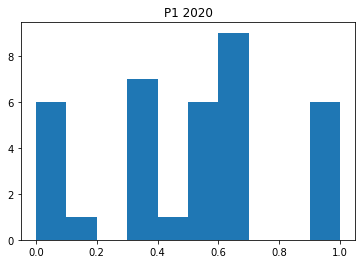

In [31]:
df_Sber_P1 = df_Sber[df_Sber['question']=='P1']
plt.title('P1 2020')
plt.hist(df_Sber_P1.overlap)

(array([20.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0., 14.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

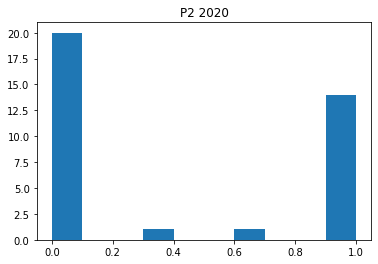

In [32]:
df_Sber_P2 = df_Sber[df_Sber['question']=='P2']
plt.title('P2 2020')
plt.hist(df_Sber_P2.overlap)

(array([28.,  0.,  3.,  5.,  0.,  0.,  1.,  0.,  0.,  8.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

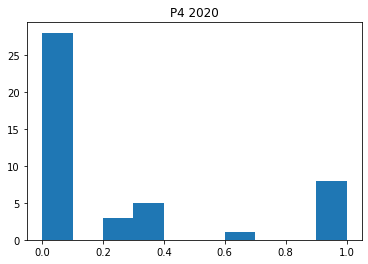

In [33]:
df_Sber_P4 = df_Sber[df_Sber['question']=='P4']
plt.title('P4 2020')
plt.hist(df_Sber_P4.overlap)

(array([5., 0., 1., 0., 0., 4., 6., 0., 1., 4.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

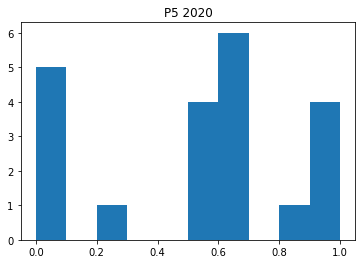

In [34]:
df_Sber_P5 = df_Sber[df_Sber['question']=='P5']
plt.title('P5 2020')
plt.hist(df_Sber_P5.overlap)

(array([1., 0., 0., 1., 1., 1., 0., 0., 0., 6.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

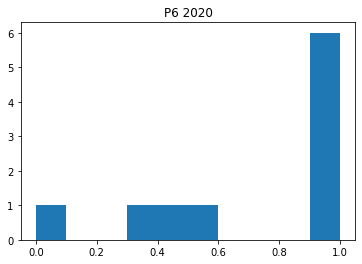

In [35]:
df_Sber_P6 = df_Sber[df_Sber['question']=='P6']
plt.title('P6 2020')
plt.hist(df_Sber_P6.overlap)